<a href="https://colab.research.google.com/github/graphtrek/tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.6.0'

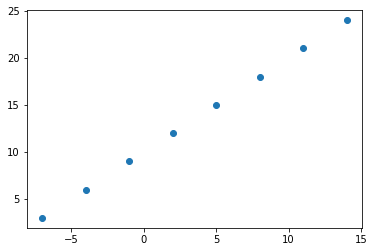

In [ ]:
X = np.array([-7.0, -4.0, -1.0,  2.0,  5.0,  8.0, 11.0, 14.0])
y = np.array([ 3.0,  6.0,  9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
plt.scatter(X,y)

In [ ]:
## turn numpy arryes into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

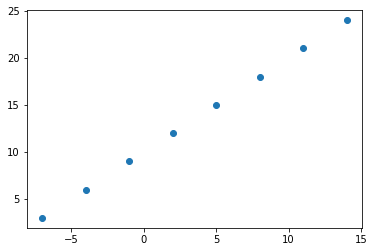

In [ ]:
plt.scatter(X,y)

## Creating the model
1. **Create the model** define the in/out layers keras.layers.Dense
2. **Compile the model** set the loss function i.e.: Mean Absolute Error and th optimezer i.e Sochastic gradinet descent 
3. **Fit the model**

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1) ## we use 1 neuron for the input and output layers
])

model.compile(
    loss=tf.keras.metrics.MAE, ## tf.keras.losses.MAE
    optimizer=tf.keras.optimizers.SGD(), ## tf.keras.optimizers.SGD
    metrics=["mae"]) ## tf.keras.metrics.MAE mea = Mean Absolute Error

X = tf.cast(X,dtype=tf.float32) # layers.Dense default dtype is float 32
y = tf.cast(y,dtype=tf.float32)

model.fit(X, y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 595ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
y_pred = model.predict([17.0])
17.0 + 10.0 ,y_pred, y_pred + 10.9748

(27.0, array([[12.716021]], dtype=float32), array([[23.69082]], dtype=float32))

## Improving the model

In [ ]:
model1 = tf.keras.Sequential([
   tf.keras.layers.Dense(50, activation=None),
   tf.keras.layers.Dense(1)                           
])

model1.compile(loss=tf.keras.losses.MAE,
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=tf.keras.metrics.MAE)

model1.fit(X, y, epochs=100)

y1_pred = model1.predict([17.0])
y1_pred, X, y

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 384ms/step - loss: 14.6466 - mean_absolute_error: 14.6466
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.9532 - mean_absolute_error: 13.9532
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 13.2603 - mean_absolute_error: 13.2603
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.5659 - mean_absolute_error: 12.5659
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 11.8675 - mean_absolute_error: 11.8675
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1621 - mean_absolute_error: 11.1621
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4475 - mean_absolute_error: 10.4475
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7214 - mean_absolute_error: 9.7214
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 8.9817 - mean_absolute_error: 8.9817
Epoch 10/100

(array([[26.434414]], dtype=float32),
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Evaluating the model

Nr of data:50


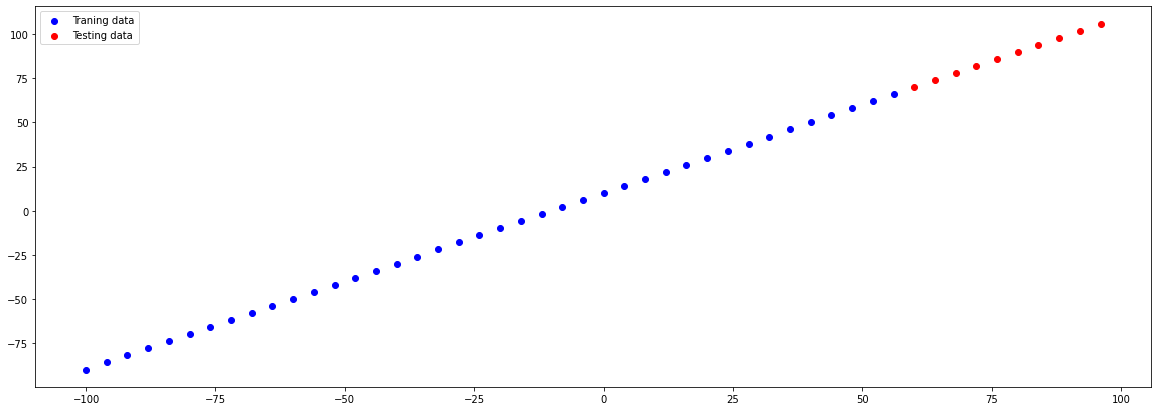

In [ ]:
X = tf.range(-100,100, 4)
y = X + 10

print("Nr of data:" + str(len(X)))

X_train = X[:40] ## first 40
y_train = y[:40] ## first 40

X_test = X[40:] # last 10
y_test = y[40:] # last 10

plt.figure(figsize=(20,7))
plt.scatter(X_train,y_train,color="blue", label="Traning data")
plt.scatter(X_test,y_test,color="red", label="Testing data")
plt.legend()
plt.show()

Model: "Test_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


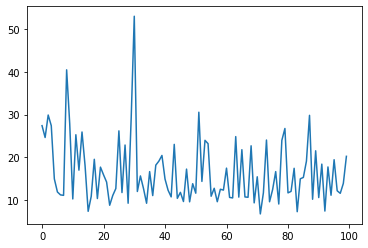

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  #tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.Input(shape=(1,),name="input_layer"),
  tf.keras.layers.Dense(10, name="hidden_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
],name="Test_model")

model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.summary()

model0 = model.fit(X_train, y_train, epochs=100, verbose=0)
plt.plot(model0.history["loss"])

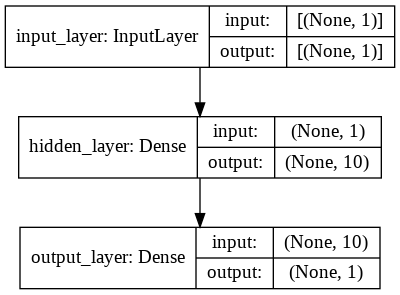

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True,show_layer_names=True)

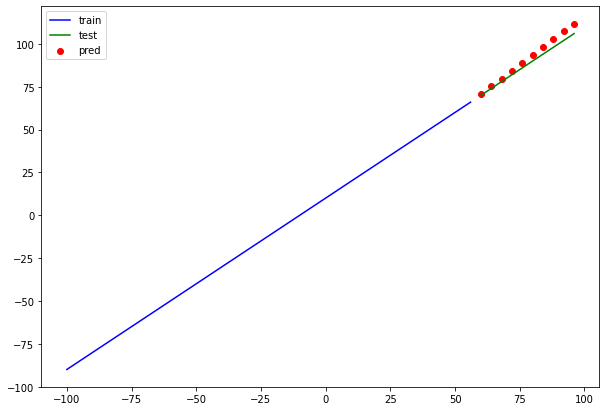

In [ ]:
y_pred = model.predict(X_test)
y_pred, y_test
plt.figure(figsize=(10,7))
plt.plot(X_train,y_train,color="blue",label="train")
plt.plot(X_test, y_test, color="green",label="test")
plt.scatter(X_test, y_pred, color="red",label="pred")
plt.legend()
plt.show()